In [1]:
import sys

sys.path.append('../..') # Add backtester base dir to $PYTHONPATH

In [2]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
import pyfolio as pf
import pandas as pd
import os
import matplotlib.pyplot as plt
import altair as alt

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 8)

/usr/local/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
from backtester.datahandler import HistoricalOptionsData
from backtester.strategy import Strategy, StrategyLeg
from backtester.option import Type, Direction
from backtester import Backtest
from backtester.statistics import monthly_returns_heatmap, returns_histogram, returns_chart

In [4]:
# Cleaned up data
data = HistoricalOptionsData("options_data_clean_v2.h5", key="/SPX", where='quotedate >= "2006-12-06" & quotedate <= "2015-08-21"')
schema = data.schema

we test a (monhtly) strategy of selling puts at different OTM percentages

In [5]:
otm_percentages = [0,3,5,7,10,15,20,25,35]

In [6]:
bt = Backtest()
bt.data = data
bt.stop_if_broke = False
trade_logs = []
summaries = []
balances = []
pct_tolerance = 1
for otm_pct in otm_percentages:
    strat = Strategy(schema)
    leg = StrategyLeg(
            "leg_1",
            schema,
            option_type=Type.CALL,
            direction=Direction.SELL,
        )

    otm_lower_bound = (otm_pct - pct_tolerance) / 100
    otm_upper_bound = (otm_pct + pct_tolerance) / 100

    leg.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 61) & (
            schema.dte <= 90) & (schema.strike >= schema.underlying_last *
                                                 (1 + otm_lower_bound)) & (schema.strike <= schema.underlying_last *
                                                                           (1 + otm_upper_bound))
    leg.exit_filter = (schema.dte <= 60)
    strat.add_leg(leg)
    bt.strategy = strat
    bt.run(monthly=True)
    trade_logs.append(bt.trade_log)
    summaries.append(bt.summary())
    balances.append(bt.balance)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:09
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


/usr/local/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:445: RuntimeWarning: invalid value encountered in double_scalars
  return ending_value ** (1 / num_years) - 1
/usr/local/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:1492: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Start date,2006-12-06
End date,2015-08-03
Total months,5
,Backtest
Annual return,nan%
Cumulative returns,-318.6%
Annual volatility,11596.2%
Sharpe ratio,-1.82
Calmar ratio,NaN
Stability,NaN
Max drawdown,-138.3%


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,138.33,2009-04-01,2015-03-02,NaT,NaN
1,137.04,2007-03-01,2007-06-01,2008-02-01,242
2,28.94,2007-01-03,2007-02-01,2007-03-01,42
3,8.73,2008-03-03,2008-05-01,2008-06-02,66
4,0.86,2008-12-01,2009-01-02,2009-02-02,46


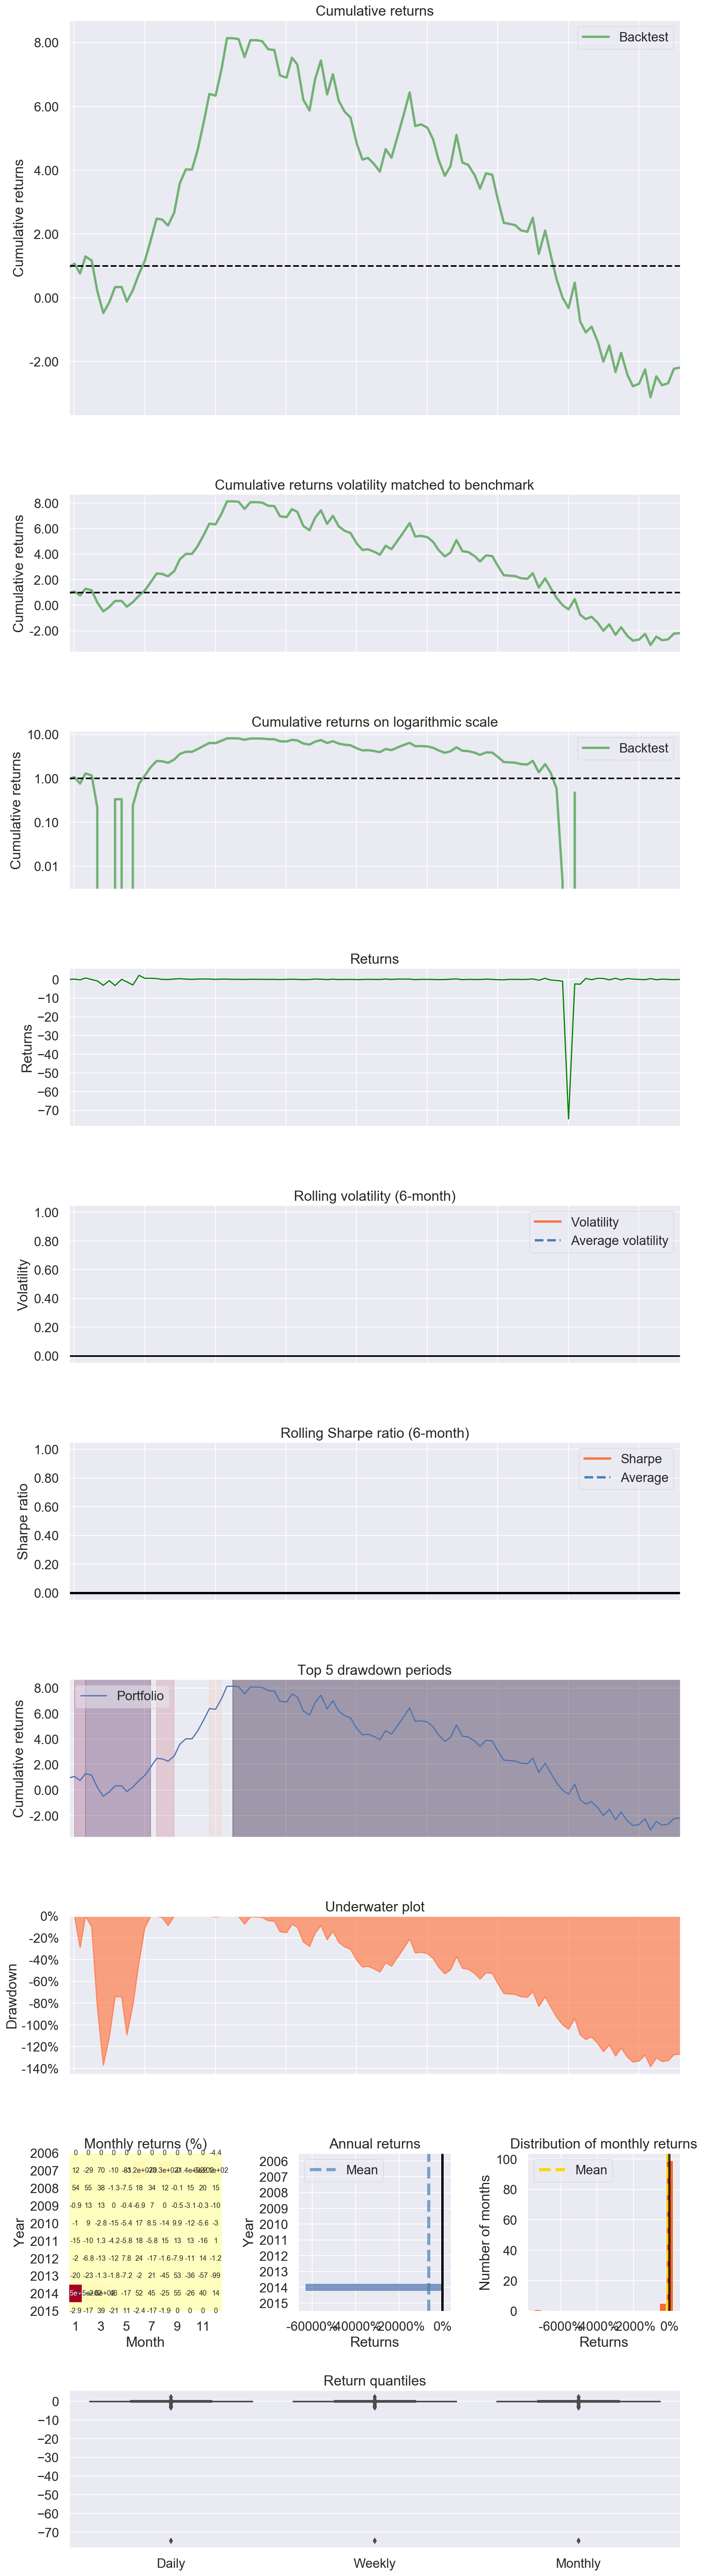

In [12]:
pf.create_returns_tear_sheet(returns = balances[0]['% change'].dropna())